In [241]:
import graphviz
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [242]:
# 1. Відкрити та зчитати наданий файл з даними.
# 2. Визначити та вивести кількість записів та кількість полів у
# завантаженому наборі даних.

df = pd.read_csv('dataset3.csv', header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       19020 non-null  float64
 1   1       19020 non-null  float64
 2   2       19020 non-null  float64
 3   3       19020 non-null  float64
 4   4       19020 non-null  float64
 5   5       19020 non-null  float64
 6   6       19020 non-null  float64
 7   7       19020 non-null  float64
 8   8       19020 non-null  float64
 9   9       19020 non-null  float64
 10  10      19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [243]:
# 3. Вивести перші 10 записів набору даних

df.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


In [244]:
# 4. Розділити набір даних на навчальну (тренувальну) та тестову вибірки,
# попередньо перемішавши початковий набір даних.

shuffled_df = df.sample(frac=1, ignore_index=True, random_state=42)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [245]:
# 5. Використовуючи відповідні функції бібліотеки scikit-learn, збудувати
# класифікаційну модель дерева прийняття рішень глибини 5 та навчити
# її на тренувальній вибірці, вважаючи, що в наданому наборі даних
# цільова характеристика визначається останнім стовпчиком, а всі інші
# виступають в ролі вихідних аргументів

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

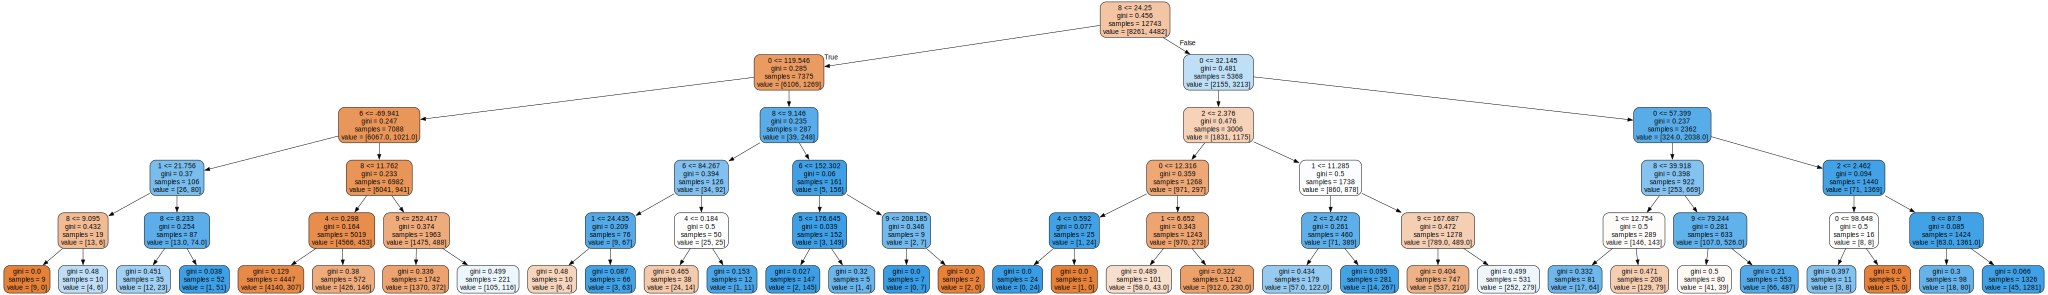

In [246]:
# 6. Представити графічно побудоване дерево за допомогою бібліотеки
# graphviz.

dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True)

graph = graphviz.Source(dot_data)
graph

- training set metrics
accuracy: 0.839519736325826
precision: 0.8390868470513144
recall: 0.839519736325826
f1 score: 0.8350857449214448

- test set metrics
accuracy: 0.8293770909670225
precision: 0.8286100963853031
recall: 0.8293770909670225
f1 score: 0.824286171406129



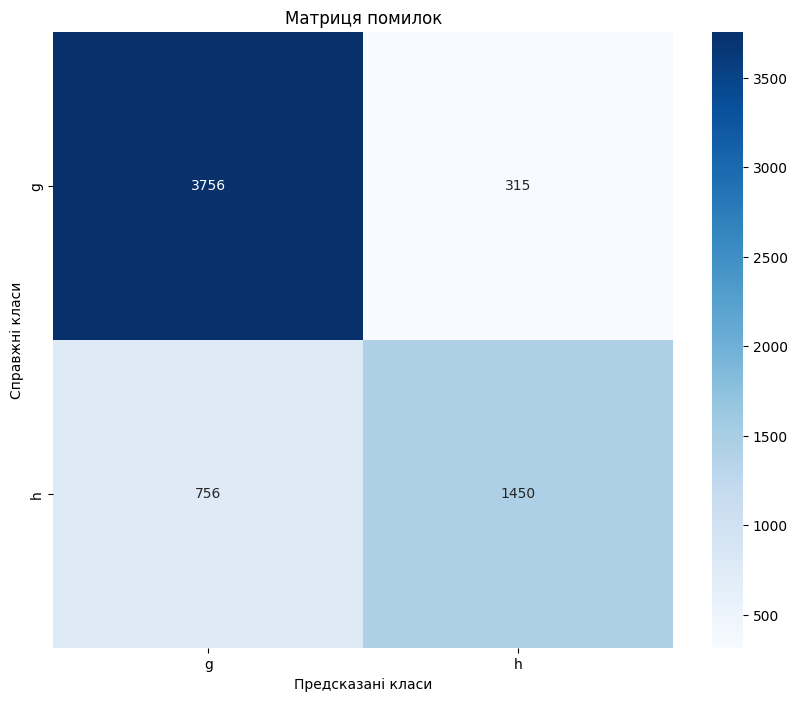

In [247]:
# 7. Обчислити класифікаційні метрики збудованої моделі для тренувальної
# та тестової вибірки. Представити результати роботи моделі на тестовій
# вибірці графічно. Порівняти результати, отриманні при застосуванні
# різних критеріїв розщеплення: інформаційний приріст на основі
# ентропії чи неоднорідності Джині

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

def get_metrics(model, y, y_pred):
    print(f'- {model} set metrics')
    print(f'accuracy: {accuracy_score(y, y_pred)}')
    print(f'precision: {precision_score(y, y_pred, average='weighted', zero_division=0)}')
    print(f'recall: {recall_score(y, y_pred, average='weighted')}')
    print(f'f1 score: {f1_score(y, y_pred, average='weighted')}\n')

get_metrics("training", y_train, y_train_pred)
get_metrics("test", y_test, y_test_pred)

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Предсказані класи')
plt.ylabel('Справжні класи')
plt.title('Матриця помилок')
plt.show()

In [248]:
results = {}

for criterion in ['entropy', 'gini']:
    clf = DecisionTreeClassifier(criterion=criterion, max_depth=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results[criterion] = {'accuracy': accuracy_score(y_test, y_pred),
                          'precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
                          'recall': recall_score(y_test, y_pred, average='weighted'),
                          'f1 score': f1_score(y_test, y_pred, average='weighted')}

for criterion, metrics in results.items():
    print(f"criterion: {criterion}")
    print(f"accuracy: {metrics['accuracy']}")
    print(f"precision: {metrics['precision']}")
    print(f"recall: {metrics['recall']}")
    print(f"f1 score: {metrics['f1 score']}")
    print()

criterion: entropy
accuracy: 0.8148797196112793
precision: 0.8129608035224379
recall: 0.8148797196112793
f1 score: 0.8135692010695708

criterion: gini
accuracy: 0.8293770909670225
precision: 0.8286100963853031
recall: 0.8293770909670225
f1 score: 0.824286171406129



{'max_depth': {2: 0.7949657479687748, 7: 0.8438744623227656, 12: 0.8362274972120439, 17: 0.8303329616058627, 22: 0.8147204078381393, 27: 0.8164728373426796, 32: 0.8097817428707982, 37: 0.8086665604588179, 42: 0.8086665604588179}, 'min_samples_leaf': {2: 0.8153576549306993, 22: 0.8470606977855664, 42: 0.8389357973554246, 62: 0.8381392384897244, 82: 0.8339971323880835, 102: 0.8346343794806437}}
{'max_depth': {2: 0.7991838656517304, 7: 0.8739700227575924, 12: 0.9362787412697167, 17: 0.974338852703445, 22: 0.9878364592325198, 27: 0.9938789923879777, 32: 0.9993722043474849, 37: 1.0, 42: 1.0}, 'min_samples_leaf': {2: 0.9723769912893353, 22: 0.8829945852624971, 42: 0.8676135917758769, 62: 0.8588244526406654, 82: 0.8516832770933062, 102: 0.8512909048104842}}


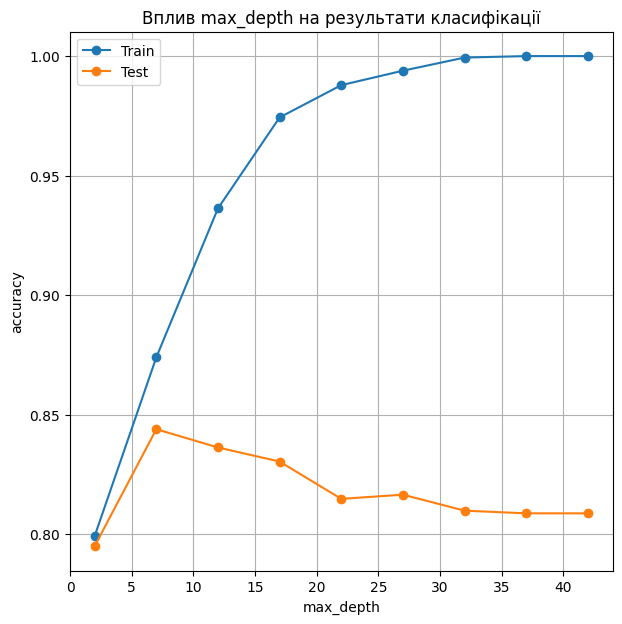

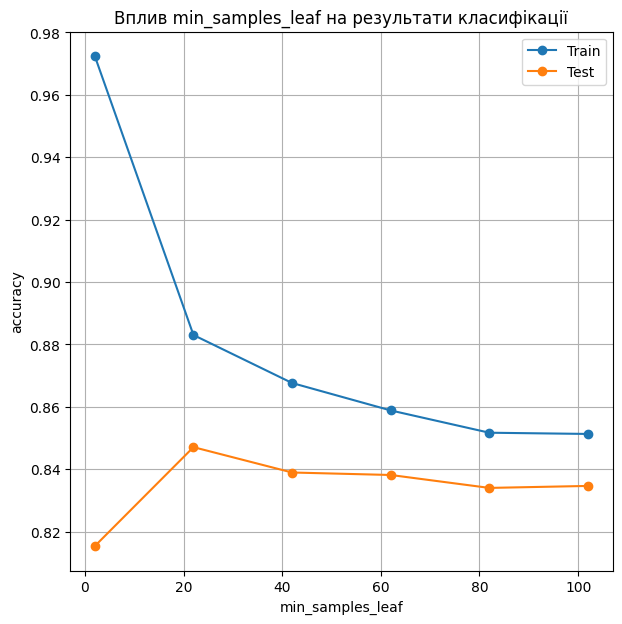

In [254]:
# 8. З’ясувати вплив максимальної кількості листів та мінімальної кількості
# елементів у внутрішньому вузлі для його подальшого розбиття на
# результати класифікації. Результати представити графічно.
accuracy_train = {'max_depth': {}, 'min_samples_leaf': {}}
accuracy_test = {'max_depth': {}, 'min_samples_leaf': {}}


for depth in range(2, 43, 5):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    accuracy_train['max_depth'][depth] = accuracy_score(y_train, clf.predict(X_train))
    accuracy_test['max_depth'][depth] = accuracy_score(y_test, clf.predict(X_test))

for min_samples in range(2, 103, 20):
    clf = DecisionTreeClassifier(min_samples_leaf=min_samples, random_state=42)
    clf.fit(X_train, y_train)
    accuracy_train['min_samples_leaf'][min_samples] = accuracy_score(y_train, clf.predict(X_train))
    accuracy_test['min_samples_leaf'][min_samples] = accuracy_score(y_test, clf.predict(X_test))

print(accuracy_test)
print(accuracy_train)


for variable in ['max_depth', 'min_samples_leaf']:
    plt.figure(figsize=(7, 7))
    plt.plot(list(accuracy_train[variable].keys()), list(accuracy_train[variable].values()), marker='o', label='Train')
    plt.plot(list(accuracy_test[variable].keys()), list(accuracy_test[variable].values()), marker='o', label='Test')
    plt.xlabel(variable)
    plt.ylabel('accuracy')
    plt.title(f'Вплив {variable} на результати класифікації')
    plt.legend()
    plt.grid(True)
    plt.show()

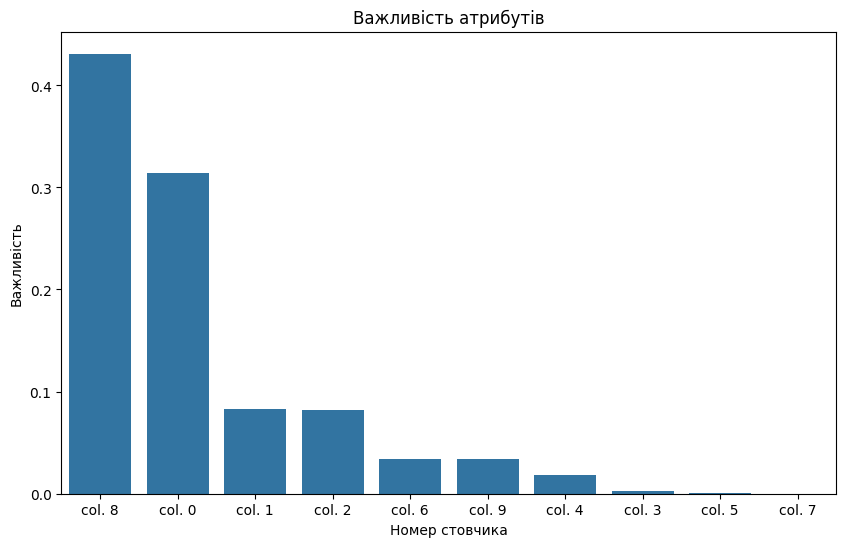

In [250]:
# 9. Навести стовпчикову діаграму важливості атрибутів, які
# використовувалися для класифікації (див. feature_importances_).
# Пояснити, яким чином – на Вашу думку – цю важливість можна
# підрахувати.

importances = clf.feature_importances_
importances_df = pd.DataFrame({'feature': [f'col. {str(el)}' for el in X.columns], 'importance': importances})
importances_df = importances_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importances_df, y='importance', x='feature')
plt.title('Важливість атрибутів')
plt.xlabel('Номер стовчика')
plt.ylabel('Важливість')
plt.show()